# Image Processing Techniques

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##  1. Color Mapping and Image Transformations

In [14]:
image = cv2.imread('00-puppy.jpg')

In [24]:
# 1. Red Green Blue (RGB) image
rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# 2. Grayscale image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# 3. Hue Saturation Value (HSV) image
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Others
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

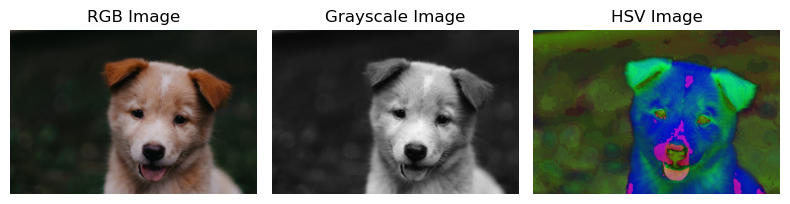

In [360]:
def display_row(images, titles=None, figsize=(15, 5)):
    fig, axes = plt.subplots(1, len(images), figsize=figsize)
    if titles is None:
        titles = [''] * len(images)

    for i, (img, title) in enumerate(zip(images, titles)):
        ax = axes[i]
        if len(img.shape) == 2:
            ax.imshow(img, cmap='gray')
        else:
            ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

display_row([rgb, gray, hsv], titles=['RGB Image', 'Grayscale Image', 'HSV Image'], figsize=(8, 10))

In [111]:
image = cv2.cvtColor(cv2.imread('00-puppy.jpg'),cv2.COLOR_BGR2RGB)
border_size = 10
white = [255, 255, 255]
image = cv2.copyMakeBorder(
    image,
    top=border_size,
    bottom=border_size,
    left=border_size,
    right=border_size,
    borderType=cv2.BORDER_CONSTANT,
    value=white
)
def show(title, img):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

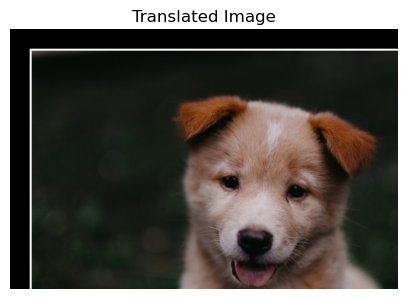

In [83]:
# 1. Translation
tx, ty = 100, 100
M_translation = np.float32([[1, 0, tx], [0, 1, ty]])
translated = cv2.warpAffine(image, M_translation, (image.shape[1], image.shape[0]))
show("Translated Image", translated)

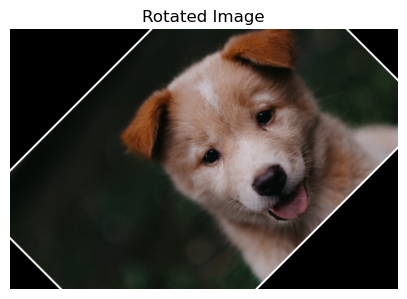

In [85]:
# 2. Rotation
angle = 45
scale = 1.0
center = (image.shape[1] // 2, image.shape[0] // 2)
M_rotation = cv2.getRotationMatrix2D(center, angle, scale)
rotated = cv2.warpAffine(image, M_rotation, (image.shape[1], image.shape[0]))
show("Rotated Image", rotated)

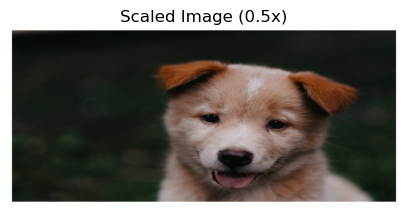

In [97]:
# 3. Scaling (Resize)
scaled = cv2.resize(image, None, fx=1.5, fy=1, interpolation=cv2.INTER_LINEAR)
show("Scaled Image (0.5x)", scaled)

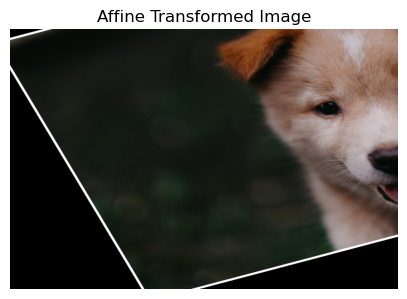

In [99]:
# 4. Affine Transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine = cv2.warpAffine(image, M_affine, (image.shape[1], image.shape[0]))
show("Affine Transformed Image", affine)

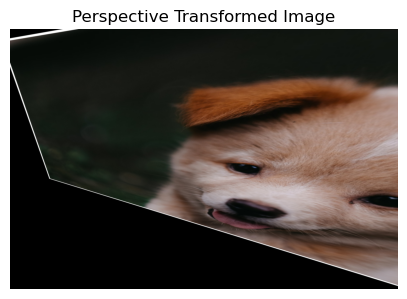

In [101]:
# 5. Perspective Transformation
pts1 = np.float32([[50, 50], [400, 50], [50, 400], [400, 400]])
pts2 = np.float32([[10, 100], [380, 50], [100, 380], [400, 400]])
M_perspective = cv2.getPerspectiveTransform(pts1, pts2)
perspective = cv2.warpPerspective(image, M_perspective, (image.shape[1], image.shape[0]))
show("Perspective Transformed Image", perspective)

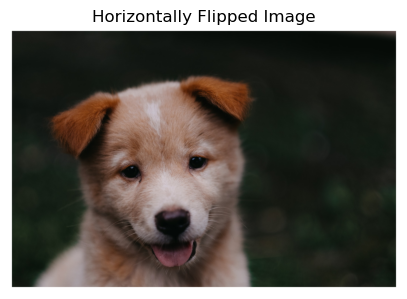

In [109]:
# 6. Flipping
flipped = cv2.flip(image, 1)  # Horizontal flip
show("Horizontally Flipped Image", flipped)
# -1 for vertical flip
# 0 for flipping both ways

## 2. Thresholding and Binarization

In [116]:
image = cv2.imread('00-puppy.jpg',cv2.IMREAD_GRAYSCALE)

In [118]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist = hist.flatten()
peak_intensity = np.argmax(hist)
print(f"Most frequent pixel intensity (threshold): {peak_intensity}")

Most frequent pixel intensity (threshold): 24


In [188]:
_, binary_thresh = cv2.threshold(image, peak_intensity, 255, cv2.THRESH_BINARY)

In [186]:
otsu_thresh_value, otsu_thresh = cv2.threshold(
    image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
print(f"Otsu's computed threshold: {otsu_thresh_value}")

(-0.5, 1949.5, 1299.5, -0.5)

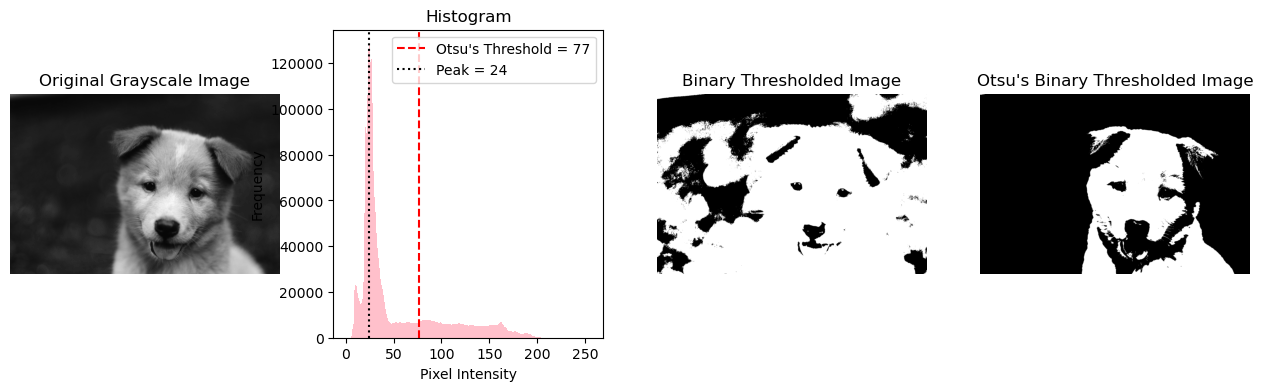

In [184]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.hist(image.ravel(), 256, [0, 256], color='pink')
plt.axvline(x=otsu_thresh_value, color='red', linestyle='--', label=f"Otsu's Threshold = {int(otsu_thresh_value)}")
plt.axvline(x=peak_intensity, color='black', linestyle=':', label=f'Peak = {peak_intensity}')
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 4, 3)
plt.imshow(binary_thresh, cmap='gray')
plt.title("Binary Thresholded Image")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Binary Thresholded Image")
plt.axis('off')

## 3. Intensity Transformations

In [246]:
def display(img,figsize=(5,6),cmap=None):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)
def plot_comparison(distorted, corrected, title):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(distorted, cmap='gray')
    plt.title('Distorted')
    plt.axis('off')s 
    
    plt.subplot(1, 2, 2)
    plt.imshow(corrected, cmap='gray')
    plt.title(f'After {title}')
    plt.axis('off')
    plt.suptitle(f'{title} Comparison', fontsize=14)
    plt.tight_layout()
    plt.show()
original = cv2.imread('00-puppy.jpg', cv2.IMREAD_GRAYSCALE)

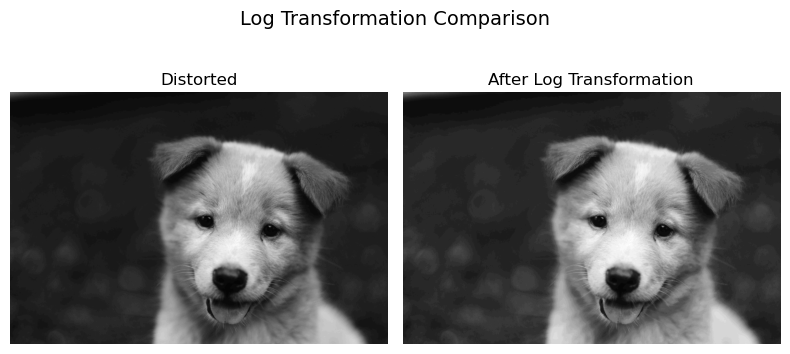

In [248]:
### 1. Log Transformation ###
# Distort: reduce contrast (compress intensities)
low_contrast = cv2.normalize(original, None, 50, 100, cv2.NORM_MINMAX)

# Log transformation
c_log = 255 / np.log(1 + np.max(low_contrast))
log_transformed = c_log * np.log(1 + low_contrast)
log_transformed = np.array(log_transformed, dtype=np.uint8)

plot_comparison(low_contrast, log_transformed, 'Log Transformation')

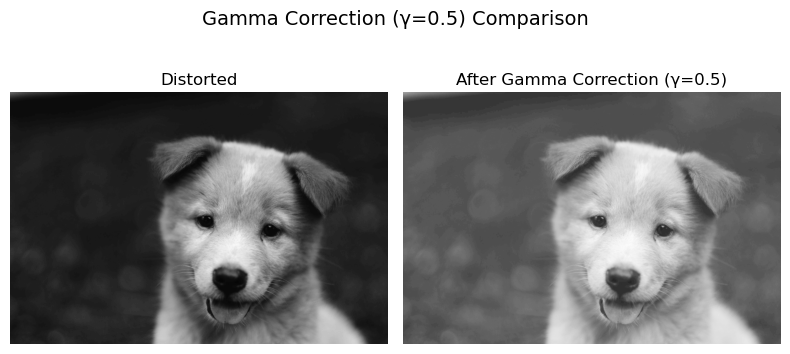

In [250]:
### 2. Gamma Correction ###
# Distort: darken image heavily
dark_image = cv2.convertScaleAbs(original, alpha=0.4, beta=0)

# Gamma correction (gamma < 1 to brighten)
gamma = 0.5
gamma_corrected = np.array(255 * (dark_image / 255) ** gamma, dtype=np.uint8)

plot_comparison(dark_image, gamma_corrected, 'Gamma Correction (γ=0.5)')


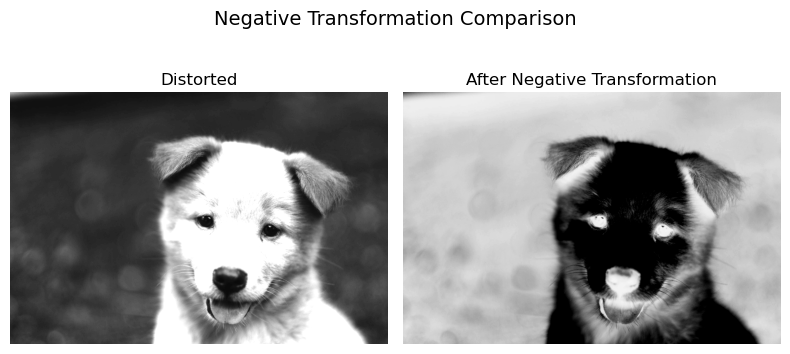

In [252]:
### 3. Negative Transformation ###
# Distort: brighten image too much (lose details in highlights)
bright_image = cv2.convertScaleAbs(original, alpha=1.5, beta=80)

# Negative transformation
negative = 255 - bright_image

plot_comparison(bright_image, negative, 'Negative Transformation')


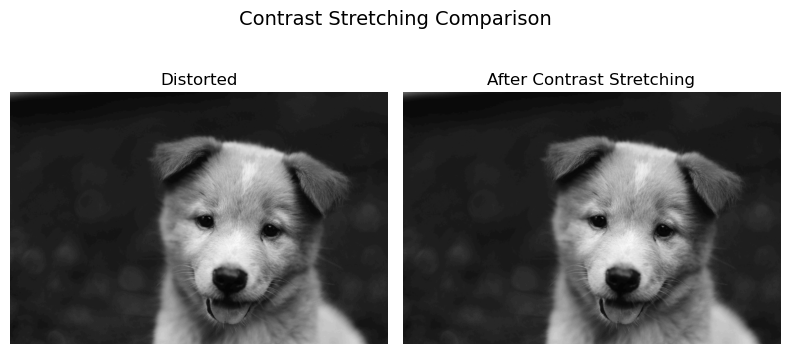

In [258]:
### 4. Contrast Stretching ###
# Distort: flatten intensities to simulate washed-out image
flattened = cv2.normalize(original, None, 100, 150, cv2.NORM_MINMAX)

# Stretch contrast to full range
min_val = np.min(flattened)
max_val = np.max(flattened)
contrast_stretched = ((flattened - min_val) / (max_val - min_val)) * 255
contrast_stretched = np.array(contrast_stretched, dtype=np.uint8)

plot_comparison(flattened, contrast_stretched, 'Contrast Stretching')

## 4. Edge Detection

In [295]:
image = cv2.imread('bricks.jpg',cv2.IMREAD_GRAYSCALE)

In [297]:
# 1. Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

In [299]:
# 2. Laplacian Edge Detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

In [301]:
# 3. Canny Edge Detection
canny = cv2.Canny(image, 100, 200)

In [303]:
# 4. Prewitt Edge Detection (manual kernel)
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(image, -1, kernelx)
prewitt_y = cv2.filter2D(image, -1, kernely)
prewitt = cv2.add(prewitt_x, prewitt_y)

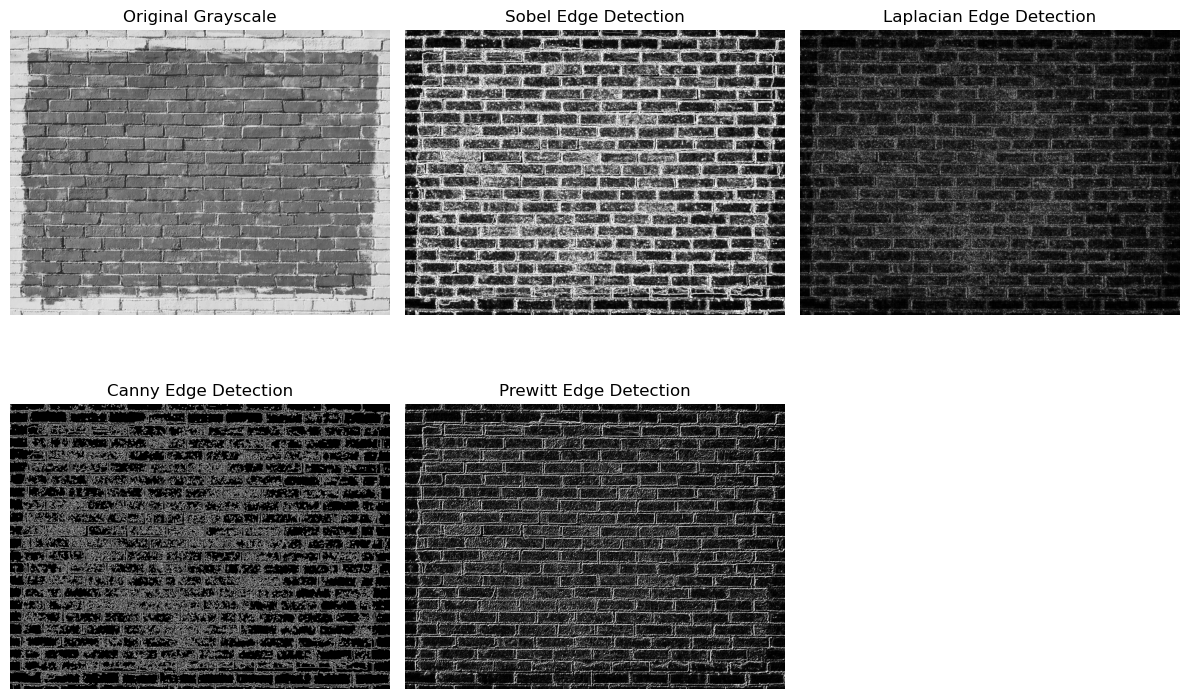

In [305]:
# Plot all results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

## 5. Image Filtering

In [374]:
def plot_filter_result(distorted, corrected, title):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(distorted)
    plt.title("Distorted Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(corrected)
    plt.title(f"After Filtering")
    plt.axis('off')
    plt.suptitle(f"{title}", fontsize=14)
    plt.tight_layout()
    plt.show()
image = cv2.imread('pixel.jpeg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

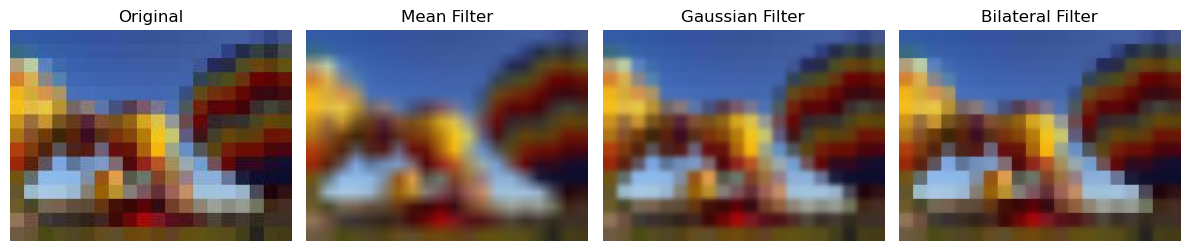

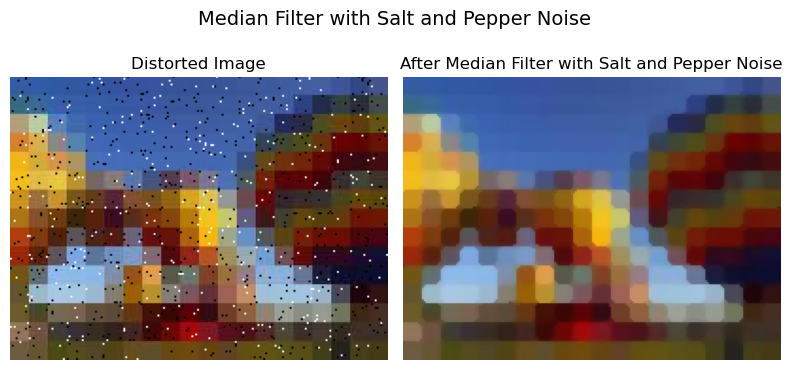

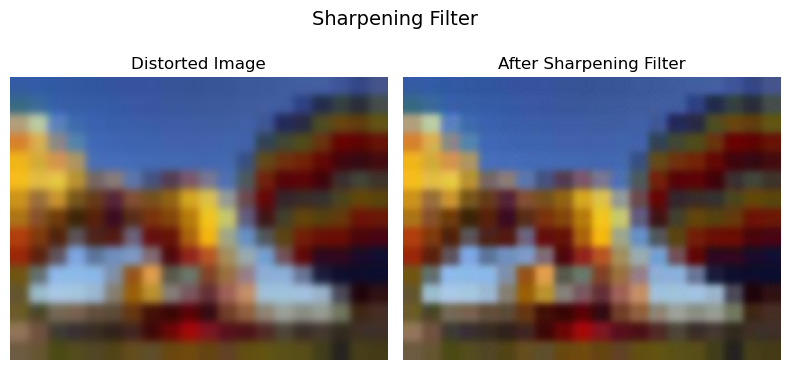

In [382]:
# 1. Averaging Filter
mean = cv2.blur(image, (10, 10))
gauss = cv2.GaussianBlur(image, (9, 9), 0)
bilat = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

display_row([image,mean,gauss,bilat],titles=['Original', 'Mean Filter','Gaussian Filter','Bilateral Filter'],figsize=(12,12))
print()

# 3. Median Filter
# Add salt-and-pepper noise
distorted_med = image.copy()
noise = np.random.randint(0, 100, (image.shape[0], image.shape[1]))
distorted_med[noise < 2] = 0
distorted_med[noise > 98] = 255
corrected_med = cv2.medianBlur(distorted_med, 5)
plot_filter_result(distorted_med, corrected_med, "Median Filter with Salt and Pepper Noise")
print()
# 5. Sharpening Filter
# Create an overly smooth (blurry) image to "correct"
distorted_sharp = cv2.GaussianBlur(image, (11, 11), 0)
# Apply sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
corrected_sharp = cv2.filter2D(distorted_sharp, -1, kernel)
plot_filter_result(distorted_sharp, corrected_sharp, "Sharpening Filter")

## 6. Template Matching

(425, 757, 3)
(128, 113, 3)


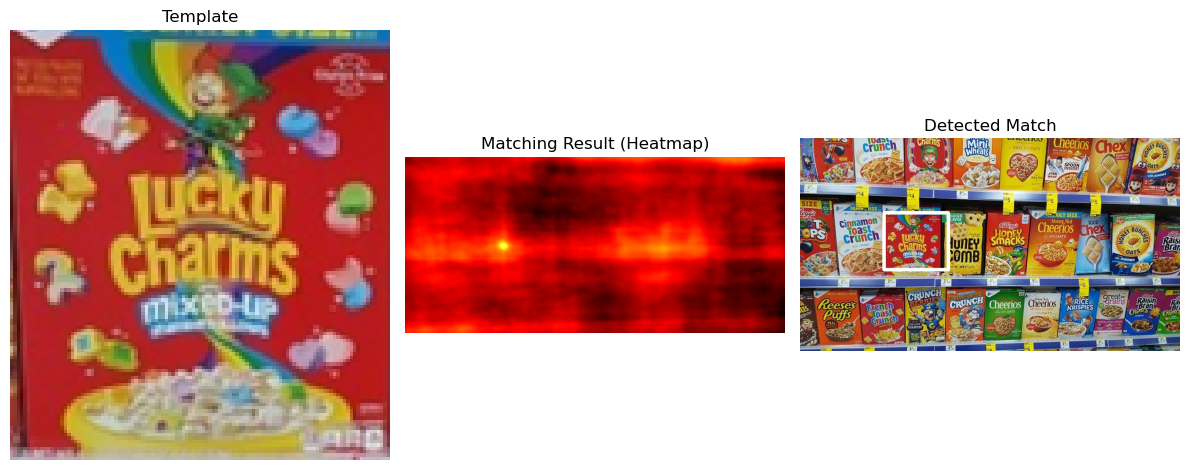

In [405]:
full = cv2.imread('many_cereals.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
template = cv2.imread('lucky_charms.jpg')
template = cv2.cvtColor(template,cv2.COLOR_BGR2RGB)
print(full.shape)
print(template.shape)
w, h = template.shape[0],template.shape[1]
res = cv2.matchTemplate(full,template,cv2.TM_CCORR_NORMED)

## cv2.TM_CCOEFF
## cv2.TM_CCOEFF_NORMED
## cv2.TM_CCORR

mini,maxi,mini_loc,maxi_loc = cv2.minMaxLoc(res)
top_left = maxi_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
matched_image = full.copy()
cv2.rectangle(matched_image, top_left, bottom_right, (255, 255, 255), 5)
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(template)
plt.title("Template")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(res, cmap='hot')
plt.title("Matching Result (Heatmap)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(matched_image)
plt.title("Detected Match")
plt.axis('off')

plt.tight_layout()
plt.show()


# Image Classification using F-MNIST

In [408]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [410]:
# =========================
# 1. Load and Preprocess Data
# =========================
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [412]:
# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [414]:
# One-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [416]:
# Convert to RGB for style transfer
def to_rgb(images):
    return np.repeat(images, 3, axis=-1)

x_train_rgb = to_rgb(x_train)
x_test_rgb = to_rgb(x_test)

In [418]:
# =========================
# 2. Apply Style Transfer
# =========================
style_model = hub.load('https://www.kaggle.com/models/google/arbitrary-image-stylization-v1/TensorFlow1/256/2')

In [420]:
def apply_style_transfer(images, style_image_path, num_samples=None):
    if num_samples is None:
        num_samples = len(images)
    style_img = tf.io.read_file(style_image_path)
    style_img = tf.image.decode_image(style_img, channels=3)
    style_img = tf.image.convert_image_dtype(style_img, tf.float32)
    style_img = style_img[tf.newaxis, :]

    stylized = []
    for img in images[:num_samples]:
        content = tf.convert_to_tensor(img[np.newaxis, ...], dtype=tf.float32)
        content = tf.image.resize(content, (256, 256))
        stylized_img = style_model(content, style_img)[0]
        stylized_img = tf.image.resize(stylized_img, (28, 28))
        stylized.append(stylized_img[0].numpy())
    return np.array(stylized)

In [422]:
stylized_train = apply_style_transfer(x_train_rgb, 'ocean.jpeg', num_samples=2000)
stylized_test = apply_style_transfer(x_test_rgb, 'ocean.jpeg', num_samples=200)

In [424]:
# =========================
# 3. Build and Train Model
# =========================
x_combined_train = np.concatenate([x_train_rgb, stylized_train], axis=0)
y_combined_train = np.concatenate([y_train_cat, y_train_cat[:2000]], axis=0)

In [426]:
model = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [428]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(x_combined_train, y_combined_train, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
969/969 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7907 - loss: 0.5926
Epoch 2/5
969/969 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8933 - loss: 0.2954
Epoch 3/5
969/969 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9091 - loss: 0.2435
Epoch 4/5
969/969 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9235 - loss: 0.2102
Epoch 5/5
969/969 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9341 - loss: 0.1787


In [430]:
# =========================
# 4. Evaluation on Stylized Test Data
# =========================
y_pred_stylized = model.predict(stylized_test)
pred_classes_stylized = np.argmax(y_pred_stylized, axis=1)
true_classes_stylized = y_test[:200]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [432]:
# Accuracy
accuracy = np.mean(pred_classes_stylized == true_classes_stylized)
print(f"\nStylized Test Accuracy: {accuracy * 100:.2f}%")


Stylized Test Accuracy: 86.50%


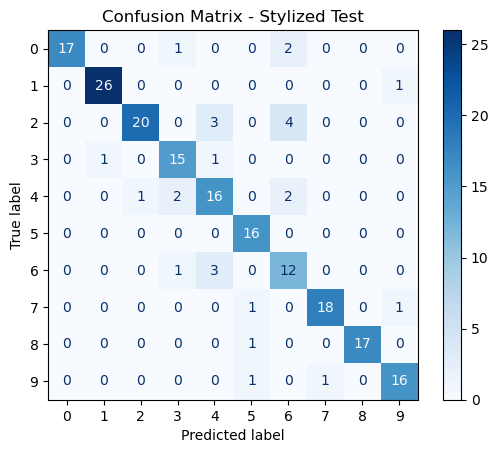

In [434]:
# Confusion Matrix
cm = confusion_matrix(true_classes_stylized, pred_classes_stylized)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Stylized Test")
plt.show()

In [436]:
# Classification Report
print("\nClassification Report (Stylized Test):")
print(classification_report(true_classes_stylized, pred_classes_stylized))



Classification Report (Stylized Test):
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.96      0.96      0.96        27
           2       0.95      0.74      0.83        27
           3       0.79      0.88      0.83        17
           4       0.70      0.76      0.73        21
           5       0.84      1.00      0.91        16
           6       0.60      0.75      0.67        16
           7       0.95      0.90      0.92        20
           8       1.00      0.94      0.97        18
           9       0.89      0.89      0.89        18

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.88      0.86      0.87       200



In [438]:
# =========================
# 5. Plot Sample Stylized Images
# =========================
def plot_samples(images, labels, preds, class_names, num=10):
    plt.figure(figsize=(15, 3))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(images[i])
        plt.title(f"T: {class_names[labels[i]]}\nP: {class_names[preds[i]]}")
        plt.axis('off')
    plt.suptitle("Sample Stylized Predictions")
    plt.tight_layout()
    plt.show()

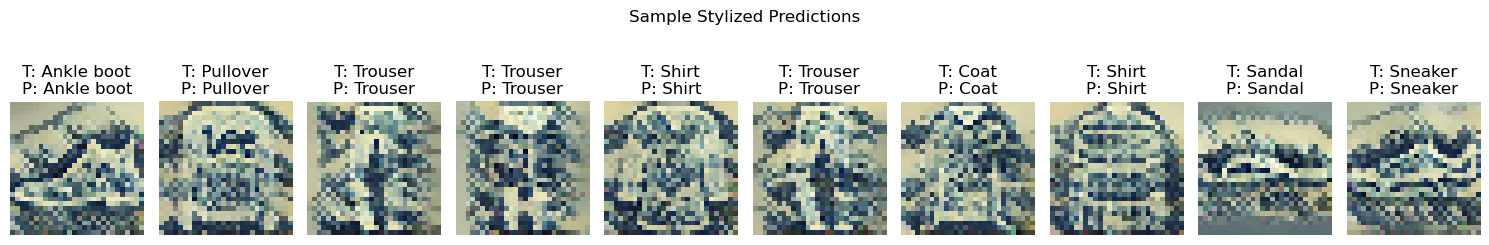

In [440]:
# Convert image format for display
sample_images = (stylized_test[:10] * 255).astype(np.uint8)
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plot_samples(sample_images, true_classes_stylized, pred_classes_stylized, class_names)


In [461]:
# =========================
# 6. Full Test Evaluation (Optional)
# =========================
x_test_rgb = to_rgb(x_test)
y_full_pred = model.predict(x_test_rgb)
full_pred_classes = np.argmax(y_full_pred, axis=1)
full_true_classes = y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
